In [1]:
# 电影评论分类:二分类

# numpy 1.17 版本与keras兼容有问题,需要设置 allow_pickle = True
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

from keras.datasets import imdb
# 加载数据,保留前1W最常见的单词
# 设置 path 以便使用本地文件
# label中 0 代表负面,1 代表正面
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(path = "imdb.npz", num_words = 10000)

# 还原 numpy 设置
np.load = old

In [6]:
# 准备数据,将训练数据向量化
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension)) # 0矩阵
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 训练、测试数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# 验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [10]:
# 构建网络
#from keras import models
#from keras import layers
# tensorflow 2.0 版本,需要如下写法
from tensorflow.keras import models
from tensorflow.keras import layers

# 层设置
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 编译模型
# 也可以使用类方式
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])


In [11]:
# 训练模型
# 512 个样本一批,迭代训练 20 轮次(partial_x_train全量数据迭代 20 次)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 137us/sample - loss: 0.5936 - accuracy: 0.6739 - val_loss: 0.4993 - val_accuracy: 0.7948
Epoch 2/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.3998 - accuracy: 0.8853 - val_loss: 0.3913 - val_accuracy: 0.8450
Epoch 3/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.2805 - accuracy: 0.9211 - val_loss: 0.3021 - val_accuracy: 0.8899
Epoch 4/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.2126 - accuracy: 0.9353 - val_loss: 0.2844 - val_accuracy: 0.8896
Epoch 5/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.1723 - accuracy: 0.9461 - val_loss: 0.2763 - val_accuracy: 0.8901
Epoch 6/20
15000/15000 [==============================] - 1s 54us/sample - loss: 0.1395 - accuracy: 0.9587 - val_loss: 0.2937 - val_accuracy: 0.8840
Epoch 7/20
15000/15000 [==============================]

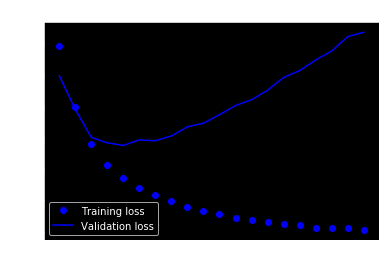

In [14]:
# 绘制训练损失和验证损失
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()


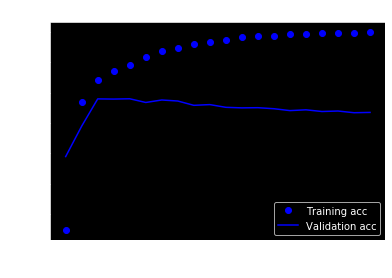

In [21]:
# 绘制训练精度和验证精度
plt.clf() #清空图像

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()